# Izaz Khan  
***Reg. No:*** B23F0001AI029  
***Section:*** AI Green  
***Course:*** ML Lab 11

***Date:*** 26/12/2025

#**Task 1: K-Means Clustering**

#**Step 1: Import Libraries and Load Data**
We need to import pandas for data handling, sklearn for the machine learning models, and matplotlib for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

#**Step 2: Feature Scaling**
K-Means uses Euclidean distance, so it is "important" to scale the features so that one feature doesn't dominate others just because of its numerical range.

In [2]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the data (Mean=0, Variance=1)
X_scaled = scaler.fit_transform(X)

#**Step 3: Find the Optimal K (The Elbow Method)**
The task asks to run K-Means for $k=2,3,4,5$ and plot the Elbow Curve to see how many clusters seem natural4444.

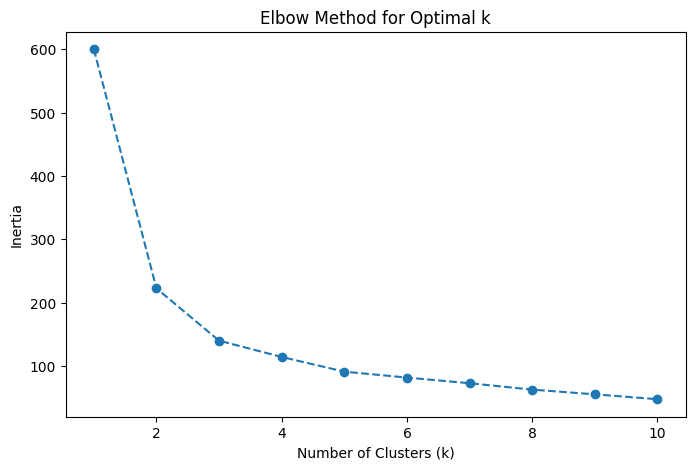

In [3]:
# Calculate inertia (sum of squared distances) for different K values
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#**Step 4: Run K-Means and Visualize with PCA**
Since the Iris data has 4 features, I use PCA (Principal Component Analysis) to reduce it to 2D so we can visualize the clusters on a flat plot.

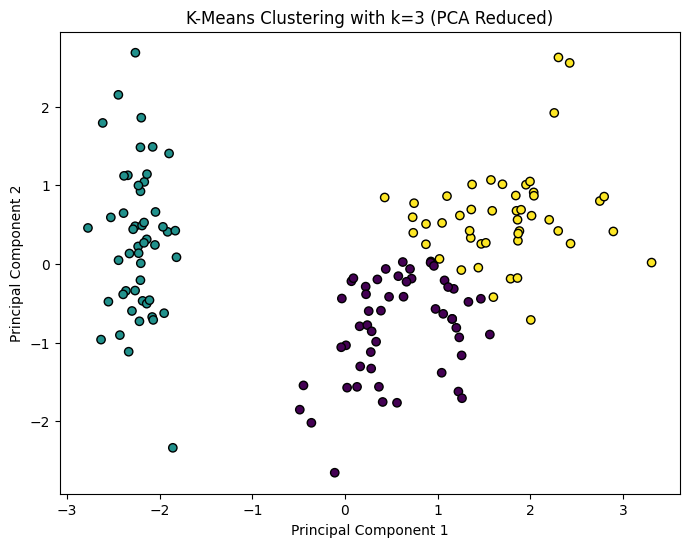

Cluster labels for first 20 samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


NameError: name 'cite' is not defined

In [4]:
# Based on the elbow, we choose k=3 (typical for Iris)
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title(f"K-Means Clustering with k={k} (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Cluster labels for first 20 samples:\n", labels[:20]) [cite: 118]

#**Task 2: Agglomerative Clustering**

#**Step 1: Import Hierarchical Clustering Tools**
We need scipy.cluster.hierarchy to generate the linkage matrix and plot the dendrograms, which visually represent the merging process.

In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


#**Step 2: Single Linkage**
Single linkage defines the distance between two clusters as the minimum distance between any single point in the first cluster and any single point in the second. This method often results in a "chaining effect," where clusters are formed in long, thin lines.

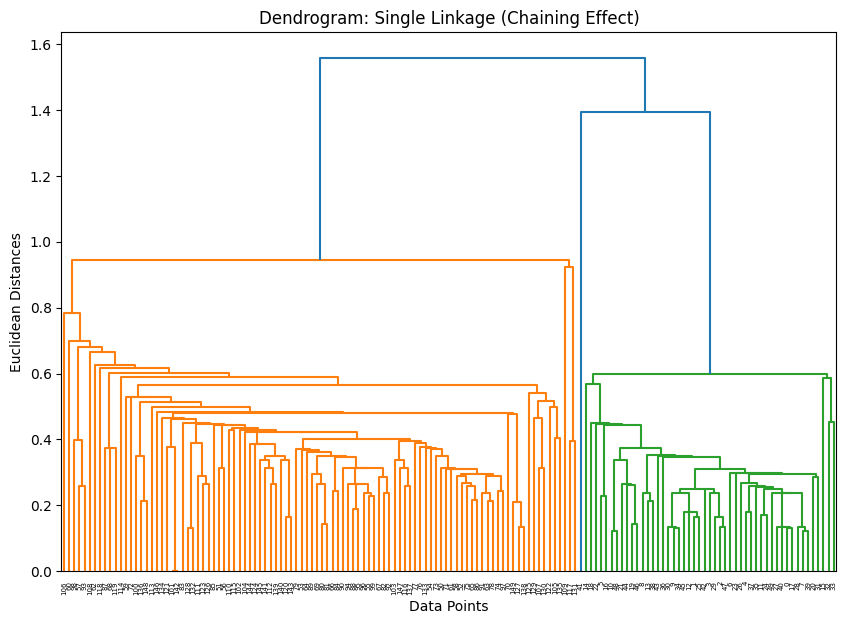

In [6]:
# Perform hierarchical clustering using Single Linkage
plt.figure(figsize=(10, 7))
linkage_single = sch.linkage(X_scaled, method='single')
sch.dendrogram(linkage_single)
plt.title('Dendrogram: Single Linkage (Chaining Effect)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

#**Step 3: Complete Linkage**
Complete linkage defines the distance between clusters as the maximum distance between any two points. This method typically produces more compact, spherical clusters compared to single linkage.

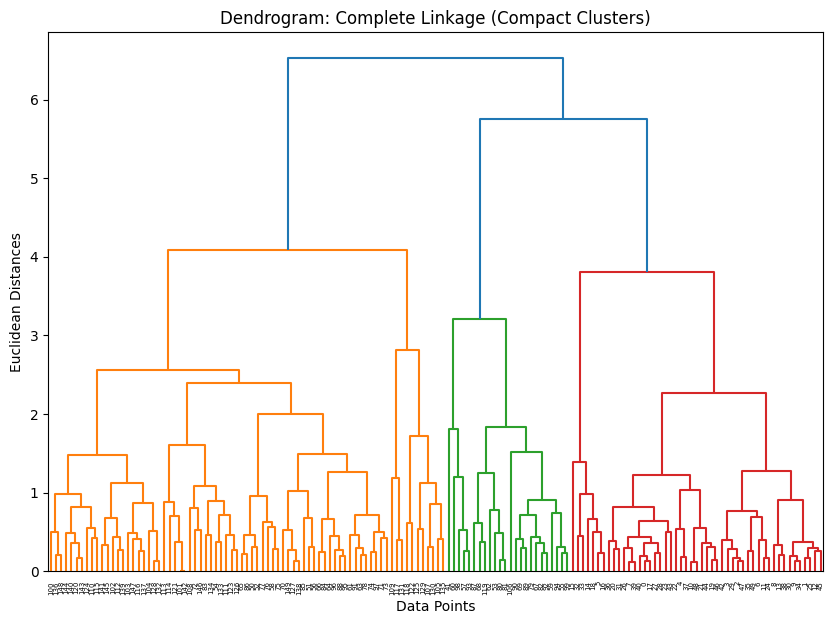

In [7]:
# Perform hierarchical clustering using Complete Linkage
plt.figure(figsize=(10, 7))
linkage_complete = sch.linkage(X_scaled, method='complete')
sch.dendrogram(linkage_complete)
plt.title('Dendrogram: Complete Linkage (Compact Clusters)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

#**Step 4: Average Linkage**
Average linkage calculates the distance between clusters by averaging the distances between all possible pairs of points in the two clusters. It serves as a balanced approach between the extremes of single and complete linkage

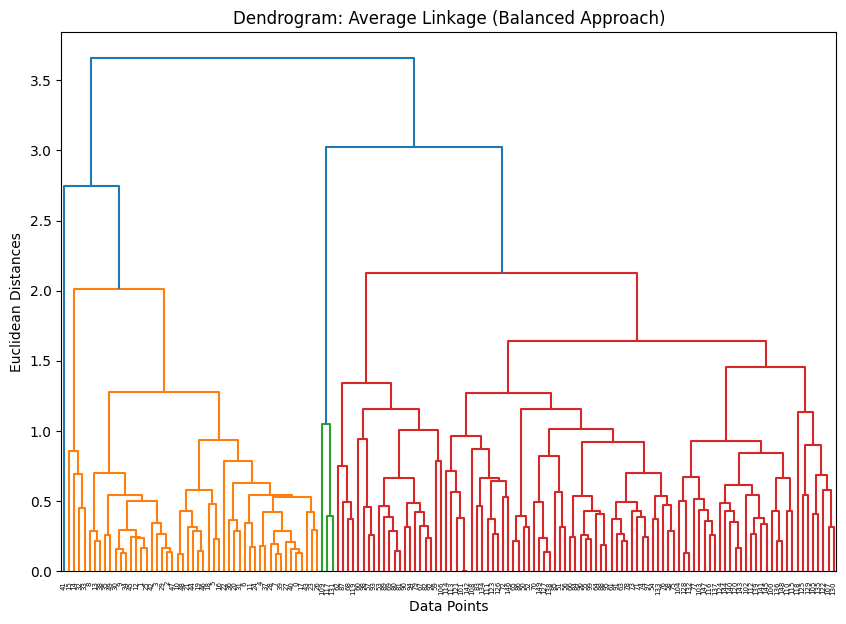

In [8]:
# Perform hierarchical clustering using Average Linkage
plt.figure(figsize=(10, 7))
linkage_average = sch.linkage(X_scaled, method='average')
sch.dendrogram(linkage_average)
plt.title('Dendrogram: Average Linkage (Balanced Approach)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

#**Step 5: Ward's Method**
Ward’s Method merges clusters to minimize the increase in total within-cluster variance. It is widely used because it effectively creates very tight, compact clusters that are often the best fit for datasets like Iris.

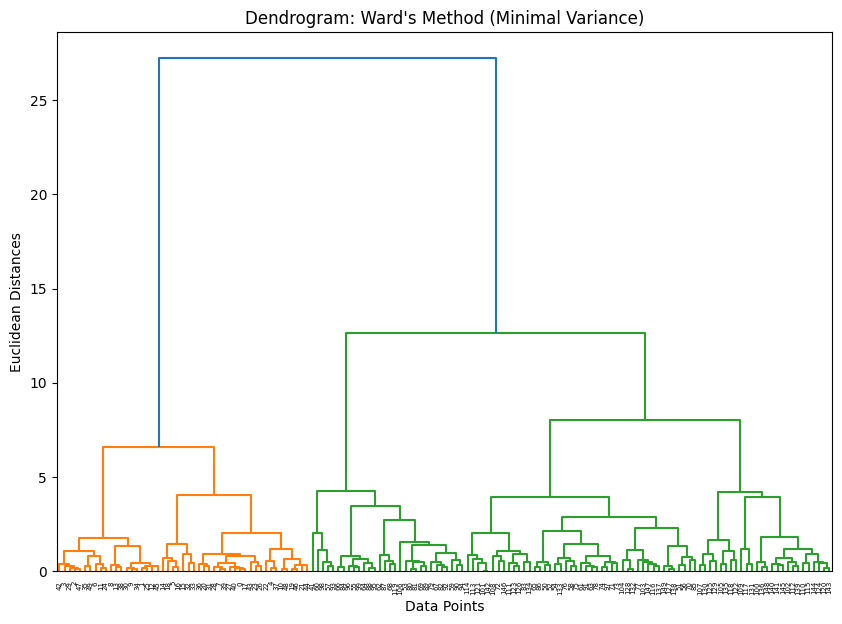

In [9]:
# Perform hierarchical clustering using Ward's Method
plt.figure(figsize=(10, 7))
linkage_ward = sch.linkage(X_scaled, method='ward')
sch.dendrogram(linkage_ward)
plt.title("Dendrogram: Ward's Method (Minimal Variance)")
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

#**Step 6: Final Agglomerative Model**
Based on the dendrograms, we can now run the final AgglomerativeClustering model to assign cluster labels to our data points.

In [11]:
# Final model with 3 clusters using Ward linkage (Updated for new sklearn versions)
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(X_scaled)

print("Agglomerative Cluster Labels (First 20 samples):\n", agg_labels[:20])

Agglomerative Cluster Labels (First 20 samples):
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#**Conclusion**

This lab successfully demonstrated the application of Unsupervised Machine Learning, which involves discovering patterns in data without the use of predefined labels. Through the implementation of K-Means, we observed how data points are grouped into flat clusters by iteratively updating centroids based on Euclidean distance. By exploring Agglomerative Hierarchical Clustering, we utilized a bottom-up approach to merge points into a tree-like dendrogram. The comparison of linkage methods showed that Ward’s Method is the most effective for creating compact, spherical clusters by minimizing variance, while Single Linkage is prone to the chaining effect. Ultimately, these clustering techniques prove essential for real-world tasks such as customer segmentation, topic modeling, and anomaly detection.